# **Clusteranalyse und Klassifikationsbäume (Unsupervised Learning)**

## **Teil 1) : Grundlagen der Clusteranalyse**

### **a) Erstellen Sie die paarweise Distanzmatrix über die Datenpunkte. Das Distanzmaß ist der euklidische Abstand**

In [1]:
from sklearn import metrics
import pandas
datasets=[[1,7],[0,9],[12,12],[8,8],[6,10],[3,4],[9,10]]
dd = metrics.pairwise_distances(datasets, metric='euclidean')
pandas.DataFrame(dd)

,0,1,2,3,4,5,6
0,0.000000,2.236068,12.083046,7.071068,5.830952,3.605551,8.544004
1,2.236068,0.000000,12.369317,8.062258,6.082763,5.830952,9.055385
2,12.083046,12.369317,0.000000,5.656854,6.324555,12.041595,3.605551
3,7.071068,8.062258,5.656854,0.000000,2.828427,6.403124,2.236068
4,5.830952,6.082763,6.324555,2.828427,0.000000,6.708204,3.000000
5,3.605551,5.830952,12.041595,6.403124,6.708204,0.000000,8.485281
6,8.544004,9.055385,3.605551,2.236068,3.000000,8.485281,0.000000


### **b) Führen Sie ein agglomeratives Clustering mit Single Linkage, Complete Linkage und CentroidLinkage durch und erstellen Sie jeweils das vollständige Dendogram. Vergleichen Sie die Unterschiede bei der Clusterbildung. Welches ist für Sie die optimale Anzahl an Clustern? Begründen Sie Ihre Antwort.**

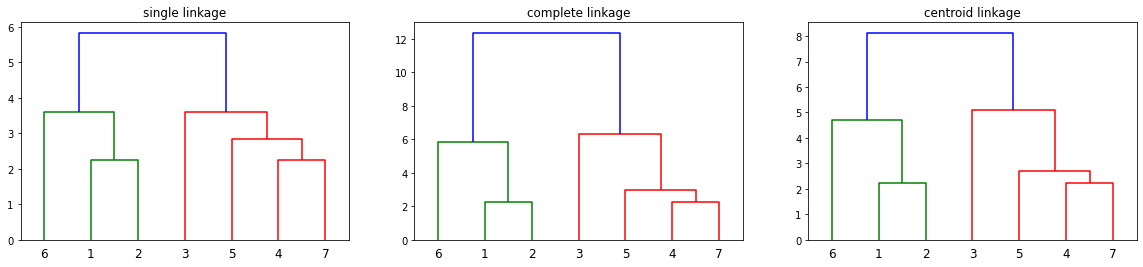

In [2]:
import matplotlib.pyplot as pyp
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_methods = ["single", "complete", "centroid"]
f, axs = pyp.subplots(ncols=3, figsize=(20, 4))

for i in range(0, 3):
    verb = linkage(datasets, linkage_methods[i])
    axs[i].set_title(linkage_methods[i] + " linkage")
    dendro = dendrogram(verb, ax=axs[i], labels=range(1, len(datasets) + 1))

### **c)  Führen Sie ein Clustering mittels DBSCAN durch. Stellen die eps und MintPts des DBSCAN so ein, dass zwei Cluster entstehen. Welche Punkte sind dann Grenzinstanzen, Kerninstanzen und Geräuschinstanzen?**

[1, 0, 12, 8, 6, 3, 9]
[7, 9, 12, 8, 10, 4, 10]
Cluster: {1}
Core Point: {7}
Noise Point: {0}


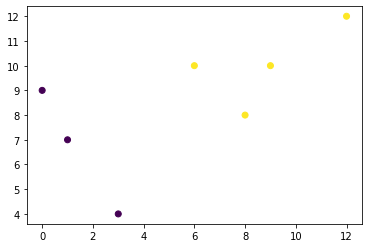

In [3]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
dbscan = DBSCAN(eps=4, min_samples=2)
x=[]
y=[]
for n in datasets:
    x.append(n[0])
    y.append(n[1])

print(x)
print(y)

databaseWithColumns = pd.DataFrame({"x": x, "y": y}, columns=["x", "y"])

dbscan.fit(databaseWithColumns)
labels=dbscan.labels_

print("Cluster:", {len(np.unique(dbscan.labels_)) - 1})
print("Core Point:", {len(dbscan.components_)})
print("Noise Point:", {list(labels).count(-1)})

pyp.scatter(databaseWithColumns["x"],databaseWithColumns["y"], c=dbscan.labels_)

### **d)  Erstellen Sie eine Heatmap (mittels seaborn.heatmap) der Ähnlichkeitsmatrix unter Berücksichtigung des ermittelten Clusterings (i.e. ordnen Sie die Punkte mit Bezug zu den Clustern) und interpretieren Sie anhand dessen die Güte des Clusterings**

[[1, 7], [0, 9], [3, 4]]
[[12, 12], [8, 8], [6, 10], [9, 10]]
[[1, 7], [0, 9], [3, 4], [12, 12], [8, 8], [6, 10], [9, 10]]
Sortierte Heatmap


<AxesSubplot:>

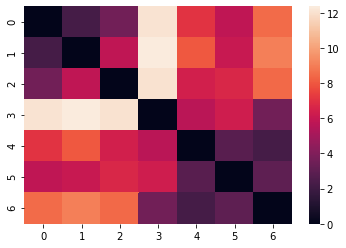

In [4]:
import seaborn as sn

sortedPoints = []
for i in set(labels):
    sortedPoints.append([])
for n in range(len(labels)):
    if -1 in labels:
        n=n+1
    sortedPoints[labels[n]].append(datasets[n])
for n in sortedPoints:
    print(n)
    
sortedPoints = [item for sublist in sortedPoints for item in sublist]
print(sortedPoints)

sortedDistance = metrics.pairwise_distances(sortedPoints, metric='euclidean')

#sn.heatmap(dd)
print('Sortierte Heatmap')
sn.heatmap(sortedDistance)

Unsortierte Heatmap


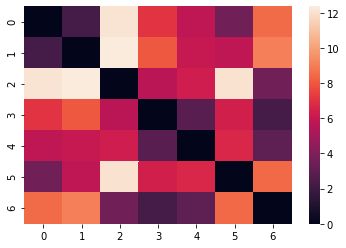

In [5]:
sn.heatmap(dd)
print('Unsortierte Heatmap')

## **Teil 2) : Partitionierende Clusteranalyse und Klassifikationsbäume**

### **a)** Generieren Sie 1000 künstliche Datensätze (samples) mit 5 metrischen Merkmalen (features) über die Scikit-Learn-Methode make_blobs. Jeder Datensatz soll einer von 4 Zielklassen (centers) zugeordnet sein.

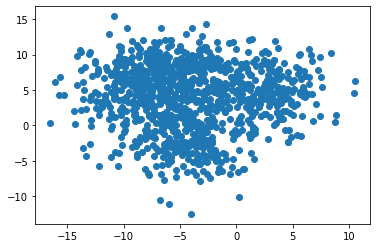

In [6]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as pyp

X, y = make_blobs(n_samples=1000, n_features=5, centers=4, cluster_std=3, random_state=5)
pyp.scatter(X[:, 0], X[:, 1])

### **b)** Visualisieren Sie die Abhängigkeiten zwischen diesen 5 Merkmalen über die Methode seaborn.pairplot. Verwenden Sie den Parameter hue der Methode um die Zielklassen in verschiedenen Farben darzustellen

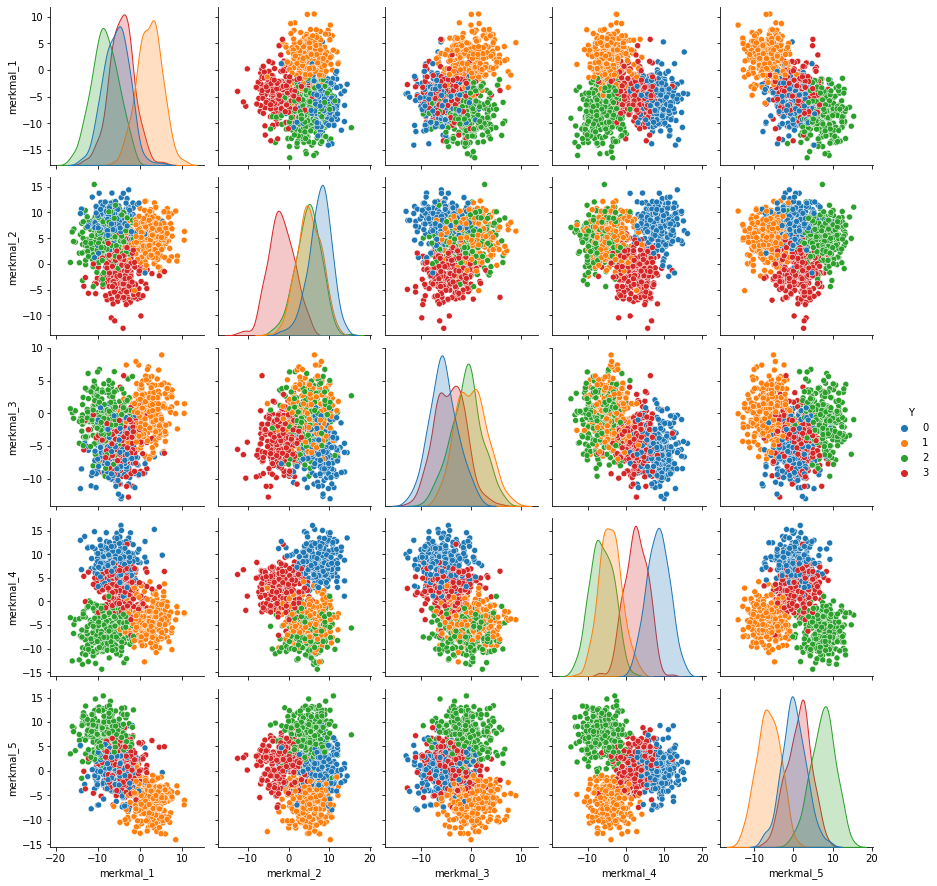

In [7]:
import seaborn as sn
import numpy as np
import pandas as pd

visualisierung = pd.DataFrame({'merkmal_1': X[:,0], 'merkmal_2': X[:,1], 'merkmal_3': X[:,2], 'merkmal_4': X[:,3], 'merkmal_5': X[:,4], 'Y': y})
sn.pairplot(visualisierung, hue="Y", palette='tab10')

## **Partitionierendes Clustering**

### **c) Führen Sie ein partitionierendes Clustering nach dem k-Means-Verfahren mittels sklearn.cluster.KMeans durch. Setzen Sie dabei den Zufallszustand wie oben angegeben.**

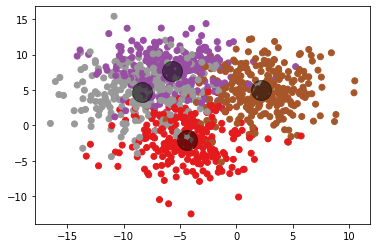

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,random_state=5)
kmeans.fit(X)
yy = kmeans.predict(X)

pyp.scatter(X[:,0], X[:,1], c=yy, cmap='Set1')
centers = kmeans.cluster_centers_
pyp.scatter(centers[:,0], centers[:,1], c='black', s=400, alpha=0.5)

### **d) Berechnen Sie die Genauigkeit des Clustering als Anteil der korrekt zugeordneten Datensätze.**

In [19]:
from sklearn.metrics import adjusted_rand_score

print(f"Das partionierende Clustering hat eine Genauigkeit von: {adjusted_rand_score(y,yy)}") 

Der Ensemble Klassifikator hat eine Genauigkeit von: 0.9174427130860394


### **e)  Geben Sie die Konfusionsmatrix (sklearn.metrics.confusion_matrix) für das Clustering mittels der Methode seaborn.heatmap aus und interpretieren Sie das Ergebnis.**

<AxesSubplot:>

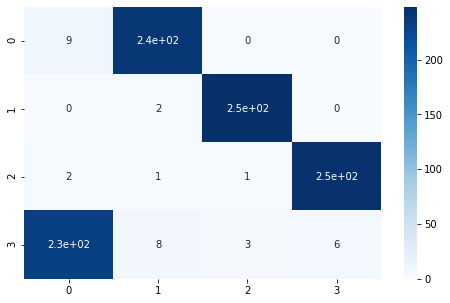

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, yy)
pyp.figure(figsize = (8,5))
sn.heatmap(cm, annot=True,cmap='Blues')

## **Klassifikationsbaum**

### **f)  Teilen Sie die Datensätze in Trainingsdaten (80%) und Testdaten (20%) mittels der Methode sklearn.model_selection.train_test_split. Setzen Sie dabei den Zufallszustand wie oben angegeben**

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=5)
print(X_train)
print(Y_train)

[[-8.12489101  2.7349505  -3.74328693 -5.34002869  7.48611825]
 [-7.60209877  5.54113595 -2.44412908  7.62903133 -1.82239205]
 [-5.8207634  12.099243   -6.78317596  6.93902391  0.07043834]
 ...
 [-8.63419034 10.08429263 -6.4235643   9.4890275  -5.76733163]
 [-0.78760209  3.4636161   4.54410013 -2.20214953 -4.13287553]
 [-8.48973773  3.16234628  1.34562717 -3.20537917  7.56006969]]
[2 0 0 2 2 3 1 3 0 3 1 1 1 1 2 2 1 3 1 1 1 1 3 0 1 2 3 0 0 1 1 0 0 1 0 2 1
 2 2 1 1 3 3 2 1 0 3 0 0 3 2 3 2 0 1 1 2 2 3 2 1 2 1 0 1 3 1 0 0 2 3 0 2 1
 3 1 3 3 1 3 2 2 3 0 1 2 2 0 0 2 2 2 0 1 2 0 2 3 0 3 3 2 3 1 2 0 0 0 2 3 2
 2 0 1 0 1 1 0 2 0 3 0 3 1 1 2 1 2 1 0 0 0 3 0 1 0 0 2 1 2 0 0 3 0 3 2 0 2
 3 3 2 0 0 3 1 0 1 2 1 2 3 3 1 1 0 0 1 1 1 0 1 0 2 3 3 0 0 2 1 2 3 0 2 1 1
 2 0 2 3 2 0 2 2 1 3 0 0 2 1 2 3 0 2 2 3 3 0 0 3 0 1 2 2 1 2 1 1 3 2 2 2 2
 2 0 3 3 2 1 1 1 3 2 2 2 0 3 2 2 2 0 1 1 0 1 0 3 2 2 0 2 0 3 3 2 0 1 3 1 2
 3 0 2 1 0 0 0 0 3 2 3 0 3 1 1 3 3 3 1 2 3 3 1 2 0 3 2 2 3 1 0 2 2 0 0 1 3
 2 2 2 0 3 3 3 2

### **g)  Trainieren Sie einen Klassifikationsbaum mittels sklearn.tree.DecisionTreeClassifier anhand der Trainingsdaten. Das Unreinheitsmaß soll der Gini-Index (criterion="gini") sein. Die minimale Verbesserung der Unreinheit für einen Split soll 0,05 (min_impurity_decrease = 0.05) betragen. Die anderen Parameter können Sie in ihren default Werten belassen**

In [12]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier(criterion="gini", min_impurity_decrease=0.05)
clf_tree = clf_tree.fit(X_train, Y_train)
print(clf_tree)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.05, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


### **h)  Visualisieren Sie den resultierenden Klassifikationsbaum mittels der Methode sklearn.tree.plot_tree (mit Parameter filled=True) und interpretieren Sie das Ergebnis**

[Text(362.7, 588.9, 'X[3] <= 0.193\ngini = 0.75\nsamples = 800\nvalue = [200, 198, 201, 201]'),
 Text(181.35, 353.34, 'X[4] <= -0.785\ngini = 0.584\nsamples = 421\nvalue = [0, 180, 199, 42]'),
 Text(90.675, 117.77999999999997, 'gini = 0.174\nsamples = 199\nvalue = [0, 180, 1, 18]'),
 Text(272.025, 117.77999999999997, 'gini = 0.193\nsamples = 222\nvalue = [0, 0, 198, 24]'),
 Text(544.05, 353.34, 'X[1] <= 2.584\ngini = 0.543\nsamples = 379\nvalue = [200, 18, 2, 159]'),
 Text(453.375, 117.77999999999997, 'gini = 0.149\nsamples = 164\nvalue = [9, 4, 0, 151]'),
 Text(634.725, 117.77999999999997, 'gini = 0.205\nsamples = 215\nvalue = [191, 14, 2, 8]')]

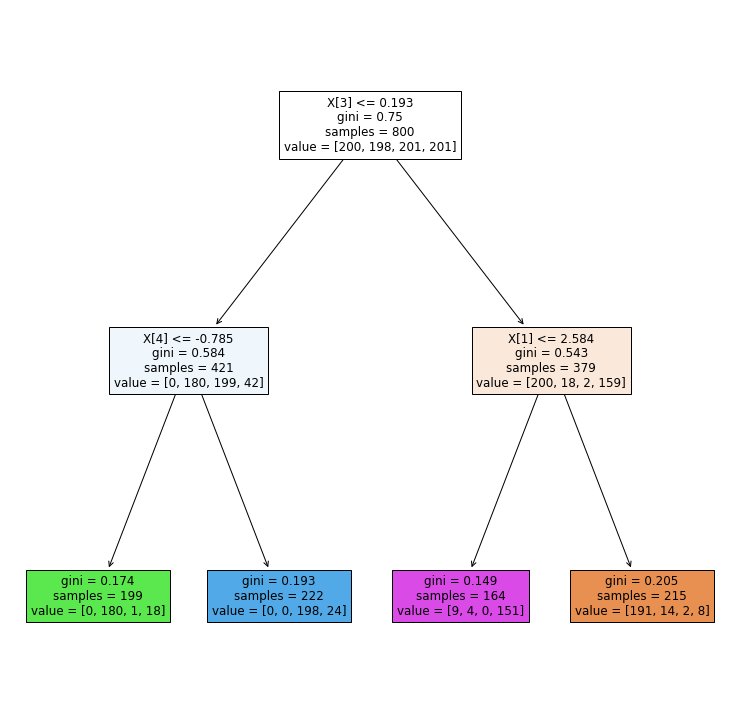

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,13))
tree.plot_tree(clf_tree, filled=True)

### **i)  Testen Sie die Genauigkeit des Klassifikationsbaums anhand der Testdaten. Geben Sie die Konfusionsmatrix für den Klassifikationsbaum mittels der Methode seaborn.heatmap aus. Was können Sie beobachten?**

Accuracy: 90.0%


<AxesSubplot:>

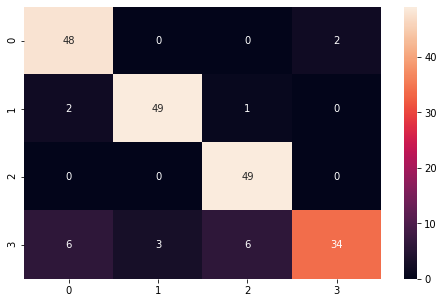

In [14]:
y_clf = clf_tree.predict(X_test)
cm = confusion_matrix(Y_test, y_clf)
print("Accuracy: {}%".format(100 * accuracy_score(Y_test, y_clf)))
plt.figure(figsize = (8,5))
sn.heatmap(cm, annot=True)

### **j)  Untersuchen Sie, wie sich die Genauigkeit des Entscheidungsbaumes in Abhängigkeit zu der Größe des Baumes entwickelt. Variieren Sie dafür den Parameter min_samples_leaf [400, 200, 100, 50, 25, 12, 6, 2] und tragen Sie die Ergebnisse in einem Diagramm ab:**

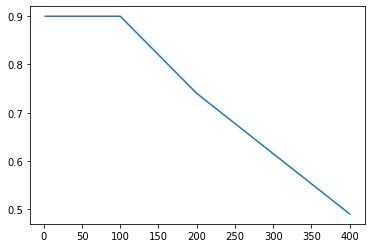

In [39]:
import matplotlib.pyplot as plt
v_accuracy= []
 
min_samples_leaf=[400, 200, 100, 50, 25, 12, 6, 2]
for n in min_samples_leaf:
    clf_tree = tree.DecisionTreeClassifier(criterion="gini", min_impurity_decrease=0.05,min_samples_leaf=n)
    clf_tree = clf_tree.fit(X_train, Y_train)
    y_clf = clf_tree.predict(X_test)
    v_accuracy.append(accuracy_score(Y_test, y_clf))


plt.plot(min_samples_leaf, v_accuracy)

plt.show()



### Man sieht, dass mit steigender Datensatzzahl für ein Leaf die Genauigkeit faellt, bei kleineren Zuschnitt vermuten wir, dass es zu einem overfitting kommt.

## **Random-Forest-Klassifikator**

### **k)  Trainieren Sie einen Random-Forest-Klassifikator, der aus 20 Bäumen (n_estimators) bestehen soll, mittels sklearn.ensemble.RandomForestClassifier. Setzen Sie dabei den Zufallszustand wie oben angegeben**

In [16]:
from sklearn.ensemble import RandomForestClassifier

randomFC = RandomForestClassifier(n_estimators=20, random_state = 5)

randomFC.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

### **l)  Testen Sie den Random-Forest-Klassifikator anhand der Testdaten und geben Sie wiederum die Genauigkeit und die Konfusionsmatrix aus. Vergleichen Sie die Ergebnisse mit den vorherigen Genauigkeiten und Konfusionsmatrizen.**

Accuracy: 96.0%


<AxesSubplot:>

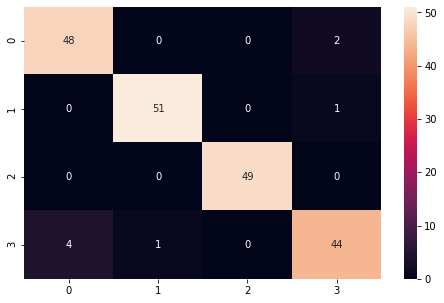

In [17]:
y_randomFC = randomFC.predict(X_test)

cm = confusion_matrix(Y_test, y_randomFC)
print("Accuracy: {}%".format(100 * accuracy_score(Y_test, y_randomFC)))
plt.figure(figsize = (8,5))
sn.heatmap(cm, annot=True)

### **m)  Erzeugen Sie wie folgt einen Bericht der Klassifikation und erkläre Sie die Begriffe der Ausgabe.**

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_true=Y_test, y_pred=y_randomFC))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        50
           1       0.98      0.98      0.98        52
           2       1.00      1.00      1.00        49
           3       0.94      0.90      0.92        49

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



*Percision =* Genauigkeit positiver predections.

*Recall:* Anteil der Positiven, die korrekt identifiziert wurden.

*F1-score =* 2*(Recall * Precision) / (Recall + Precision) | Der F1 ist das gewichtete harmonische Mittel von Präzision und Erinnerung. Je näher der Wert des F1-Scores bei 1,0 liegt, desto besser ist die erwartete Leistung des Modells.

*Support =* Support ist die Anzahl der tatsächlichen Vorkommen der Klasse im Datensatz. 

*Accuracy =* Die Genauigkeit

*Macro avg =* Berechnet die F1 getrennt nach Klassen, verwendet aber keine Gewichte für die Aggregation: F1class1+F1class2+⋅⋅⋅+F1classN

*Weighted avg =* Berechnet die F1-Punktzahl für jede Klasse unabhängig voneinander, aber wenn sie zusammenaddiert werden, wird eine Gewichtung verwendet, die von der Anzahl der echten Labels jeder Klasse abhängt: F1class1∗W1+F1class2∗W2+⋅⋅⋅+F1classN∗WN